# Prodigy InfoTech DataScience Task=02 

# Task-02
## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

## Import important libraries

In [74]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [75]:
# Reading Dataasets
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
# Columns name in both train and test DataFrame
train.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
# Statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
## Checking missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [83]:
# Dealing with Nan Values (Imputation)
def null_table(train, test):
    print("Training Data Frame")
    print(pd.isnull(train).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(test).sum())
    
null_table(train, test)   

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [84]:
# Removing 'Cabin' and 'Ticket' columns from both DataFrame

train.drop(labels = ['Cabin','Ticket'], axis = 1, inplace=True)
test.drop(labels = ['Cabin', 'Ticket'], axis = 1, inplace=True)

In [85]:
null_table(train,test)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


<AxesSubplot: xlabel='Age', ylabel='Density'>

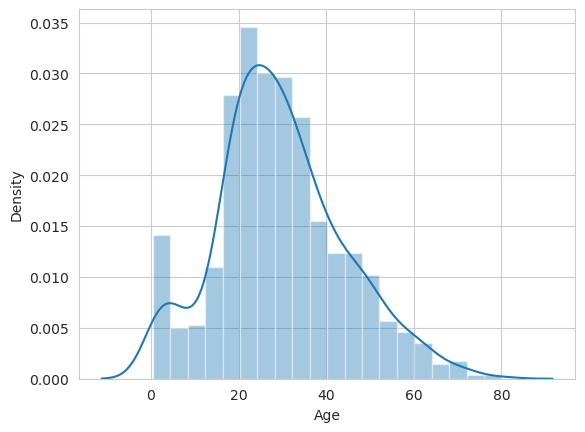

In [87]:
# Creatind copy and removing rows with missing values in the 'Age' column
copy = train.copy()
copy.dropna(inplace = True)
sns.distplot(copy['Age'])

 The distribution of ages is slightly skewed right. Because of this, I can fill in the null values with the median for the most accuracy.

In [88]:
 #The median will be an acceptable value to place in the NaN cells
train["Age"].fillna(train["Age"].median(), inplace = True)
test["Age"].fillna(test["Age"].median(), inplace = True)
train["Embarked"].fillna("S", inplace = True)
test["Fare"].fillna(test["Fare"].median(), inplace = True)


In [89]:
null_table(train, test)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [90]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [91]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## Gender 

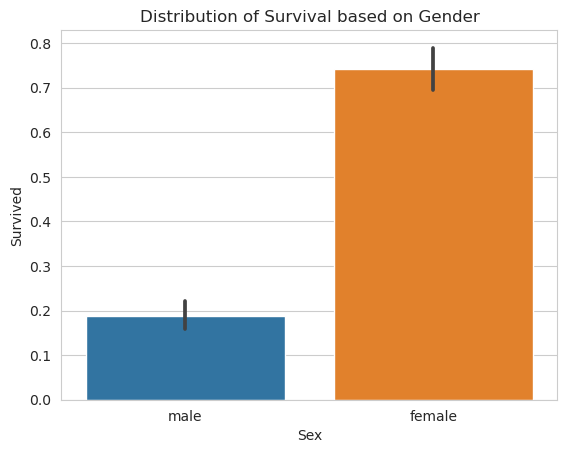

Total people survived is: 0
Proportion of Female who survived:
nan
Proportion of Male who suvived:
nan


In [92]:
# Plotting and Visualizing Data
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = train[train.Sex == "Female"]["Survived"].sum()
total_survived_males = train[train.Sex == "Male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Female who survived:")
print(total_survived_females / (total_survived_females + total_survived_males))
print("Proportion of Male who suvived:")
print(total_survived_males / (total_survived_females + total_survived_males))

Gender appears to be a very good feature to use to predict survival, as shown by the large difference
in propotion survived. Proportion of females who survived is greater than proportion of males who
survived.

## Class

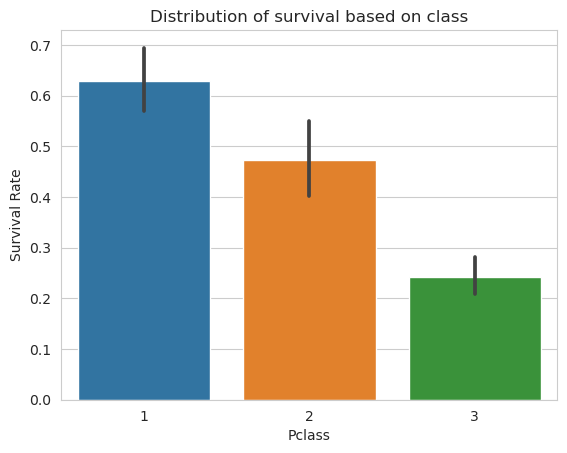

Total people survived is:342
Proportion of Class 1 Passenger who survived:
0.39766081871345027
Proportion of Class 2 Passenger who survived:
0.2543859649122807
Proportion of Class 3 Passenger who survived:
0.347953216374269


In [95]:
# Distribution of survival based on class
sns.barplot(x='Pclass', y="Survived", data=train)
plt.ylabel("Survival Rate")
plt.title("Distribution of survival based on class")
plt.show()

total_survived_one = train[train.Pclass == 1]["Survived"].sum()
total_survived_two = train[train.Pclass == 2]["Survived"].sum()
total_survived_three = train[train.Pclass == 3]["Survived"].sum()

total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is:" + str(total_survived_class))
print("Proportion of Class 1 Passenger who survived:")
print(total_survived_one / total_survived_class)
print("Proportion of Class 2 Passenger who survived:")
print(total_survived_two / total_survived_class)
print("Proportion of Class 3 Passenger who survived:")
print(total_survived_three / total_survived_class)


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

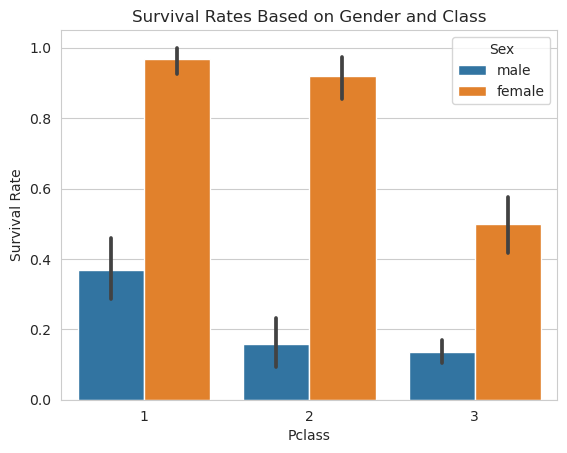

In [98]:
# Survival Rates Based on Gender and Class

sns.barplot(x='Pclass', y="Survived", hue="Sex", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

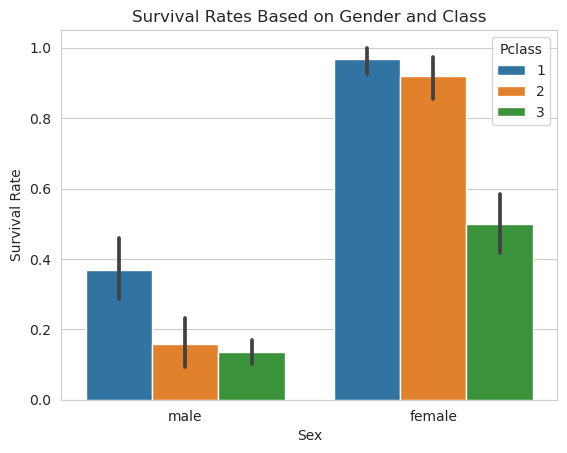

In [99]:
sns.barplot(x='Sex', y="Survived", hue="Pclass", data=train)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

People in Pclass 1 were more likely to survive than people in the other 2 Pclasses.

## Age

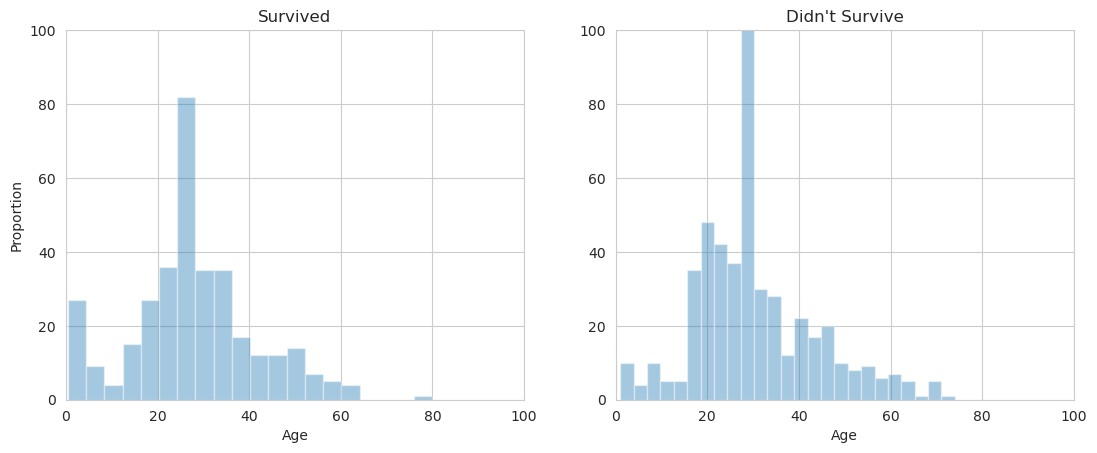

In [100]:
# Ages of passenger who survived and unsurvived 
survived_ages = train[train.Survived == 1]["Age"]
not_survived_ages = train[train.Survived == 0]["Age"]
plt.subplot(1, 2, 1)

sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)

sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()